In [13]:
import pandas as pd 

df  = pd.read_csv("sampled_data_45.csv", header = None)

m_r_p = df.iloc[1:,:-1]
star_type = df.iloc[1:,-1]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(m_r_p, star_type, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)   



KNeighborsClassifier()

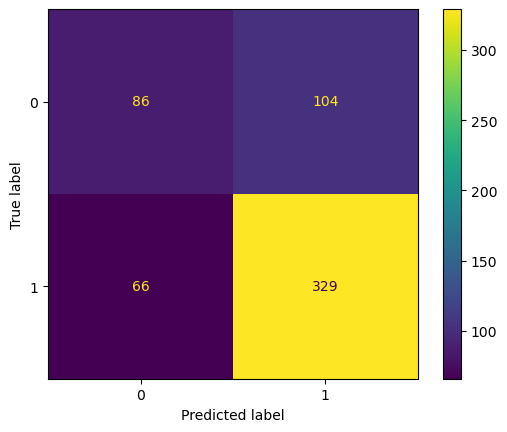

accuracy score:70.94%
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       190
           1       0.76      0.83      0.79       395

    accuracy                           0.71       585
   macro avg       0.66      0.64      0.65       585
weighted avg       0.70      0.71      0.70       585



In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

m_r_prediction = classifier.predict(X_test)
cm = confusion_matrix(y_test, m_r_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"accuracy score:{accuracy_score(y_test, m_r_prediction) * 100:.2f}%")
print(classification_report(y_test, m_r_prediction))


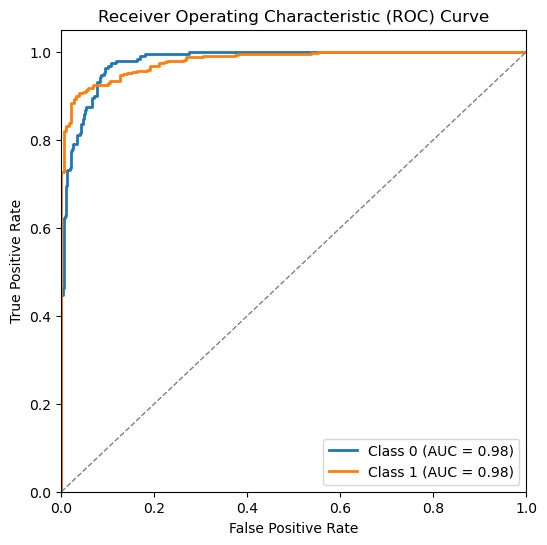

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  roc_curve, auc
import matplotlib.pyplot as plt


# Train RandomForest model
classifier = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=12, max_features="log2", random_state=0)
classifier.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_test_proba = classifier.predict_proba(X_test)
# Compute ROC curve and AUC score for each class
plt.figure(figsize=(6, 6))
for i, class_label in enumerate(classifier.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, i], pos_label=class_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=1) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
